In [1]:
#setup 
import os
import datetime
import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
!pip install scikit-learn
import sklearn

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False


In [28]:
new_table = pd.read_csv('https://raw.githubusercontent.com/giobbu/App_Traff_Forecast_DeapLearn/master/data/Flow_BEL_street_30min.csv')

In [29]:
#each column is a street identifier
new_table

,datetime,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,...,5187.0,5188.0,5189.0,5190.0,5191.0,5192.0,5193.0,5194.0,5195.0,5196.0
0,2019-01-01 00:00:00,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2019-01-01 00:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2019-01-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2019-01-01 01:30:00,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,2019-01-01 02:00:00,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,2.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2827,2019-02-28 21:30:00,1.0,2.0,2.0,3.0,11.0,0.0,0.0,0.0,2.0,...,2.0,8.0,0.0,3.0,0.0,0.0,0.0,0.0,4.0,3.0
2828,2019-02-28 22:00:00,2.0,4.0,3.0,1.0,10.0,0.0,0.0,0.0,4.0,...,10.0,3.0,0.0,4.0,0.0,1.0,2.0,1.0,1.0,1.0
2829,2019-02-28 22:30:00,2.0,8.0,1.0,0.0,8.0,0.0,0.0,0.0,5.0,...,21.0,5.0,0.0,3.0,0.0,0.0,0.0,0.0,3.0,0.0
2830,2019-02-28 23:00:00,4.0,2.0,1.0,1.0,11.0,0.0,0.0,0.0,5.0,...,10.0,5.0,0.0,2.0,1.0,0.0,0.0,1.0,0.0,1.0


In [30]:
# this source: 
# the https://www.kaggle.com/code/giobbu/seasonal-persistence-model/notebook#Results-Comparison-between-Seasonal-model-(baseline)-and-LSTM-encoder-decoder-model
# selects the roads that have an average traffic flow of 10 or larger, we also do this, this code is from the notebook listed above 

table_index = new_table.iloc[:,1:]
ALL_STREETS = list(table_index.columns.values)

mean_flow =[]
new_street=[]

mean_value = 20

for street in ALL_STREETS:
    
    single_street=table_index[street]
    mean = np.mean(single_street)
    mean_flow.append(mean)
    new_street.append(street)
    
    
df_mean_flow = pd.DataFrame({'street_index':new_street, 'mean_flow': mean_flow})
print('')
print(df_mean_flow.head())
print('')

STREETS = df_mean_flow[(df_mean_flow['mean_flow'] >= mean_value)] 
STREETS = STREETS.sort_values(by=['street_index'])
STREETS = list(STREETS.street_index)

keys_dim = 1683
keys_dim_time = 1686

print('considering a average traffic flow of ' + str(mean_value)+' per street')
print('')
print('mean traffic flow '+str(mean_value)+ ' ---> number of street segments: ' + str(len(STREETS)))


  street_index  mean_flow
0          0.0   4.048023
1          1.0  16.350282
2          2.0   6.511299
3          3.0   7.681850
4          4.0   9.484463

considering a average traffic flow of 20 per street

mean traffic flow 20 ---> number of street segments: 1683


In [31]:
# #use fast fourier transform to identify important time periods 
# plt.plot(new_table['datetime'],new_table.mean(axis= 1))
# fft = tf.signal.rfft(new_table.mean(axis=1))
# f_per_dataset = np.arange(0, len(fft))

# n_samples_h = len(new_table.mean(axis=1))/2
# hours_per_day = 24
# hours_per_dataset = n_samples_h/(hours_per_day)

# f_per_day = f_per_dataset/hours_per_dataset
# plt.step(f_per_day, np.abs(fft))
# plt.xscale('log')
# plt.ylim(0, 30000)
# plt.xlim([0.1, 1])
# plt.xticks([0.7,1, 24], labels=['1/week','1/day', '1/hour'])
# _ = plt.xlabel('Frequency (log scale)')

In [32]:
df_mean_flow

,street_index,mean_flow
0,0.0,4.048023
1,1.0,16.350282
2,2.0,6.511299
3,3.0,7.681850
4,4.0,9.484463
...,...,...
5181,5192.0,2.612641
5182,5193.0,2.862994
5183,5194.0,0.357345
5184,5195.0,5.661723


In [33]:
new_table['datetime'] = pd.to_datetime(new_table['datetime'])

C:\Users\Lucia\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  """Entry point for launching an IPython kernel.


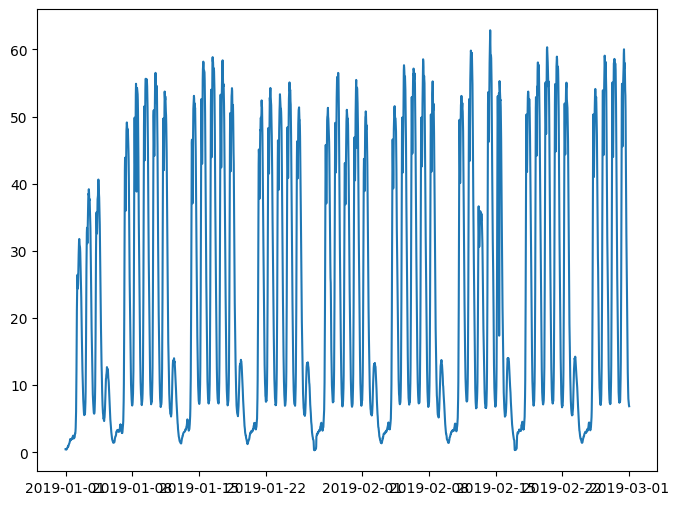

In [34]:
plt.plot(new_table['datetime'],new_table.mean(axis = 1))

In [35]:
from tensorflow.python.ops.gen_array_ops import fake_quant_with_min_max_vars_per_channel
#we need to create "windows" in the data --> 
#X: input tensor : use a window of size s, lets say 5, as X
#Y: output vector : traffic for hour six predicted based on the previous window 

#this is the window function for multiple input features and multiple output pairs
#what's the difference between df_to_x_y2 and df_to_x_y --> the first one is just for one input vector (ie the data from one street) this 
#version accepts many columns of data (all the street values and the transformed time data)
def df_to_x_y2(df, window_size): 
  feat_time = 3
  #df_as_np = df.to_numpy()
  df_as_np = df
  X = []
  Y = []
  for i in range((len(df_as_np))-window_size):
    row = [r for r in df_as_np[i:i+window_size]] #the brackets here are what makes it a tensor not a matrix
    X.append(row)
    label = [df_as_np[i+window_size][0:-feat_time]] #this is all of the traffic values (w/0 the time features)
    Y.append(label)
  return np.array(X), np.array(Y)

In [82]:
#this is for transforming datetime to recognizable inputs 
#sin and cos transformation for hour of the day 
df = new_table
df = df[STREETS + ['datetime']] 
 #this removes all of the streets with aveage flow <10 

df.head()

time = df['datetime'].to_numpy()

In [181]:
def positional_encoding(df):
  import datetime as dt
  from sklearn.preprocessing import MinMaxScaler
  print('here')
  df = pd.Series(df)
  print('here2')
  hour = df.dt.hour.to_numpy().astype('float32')
  hour_sin = np.sin(hour*2* np.pi/23)
  hour_cos = np.cos(hour*2* np.pi/23)
  
  day_of_week = df.dt.dayofweek.to_numpy()
  day_of_week_scaler = MinMaxScaler(feature_range=(-1, 1))
  day_of_week = day_of_week.reshape(-1, 1)
  day_of_week = day_of_week_scaler.fit_transform(day_of_week)
  day_of_week = day_of_week[:,0]
  
  pos_encoding_val = hour_sin + hour_cos + day_of_week
  pos_encoding_val = pos_encoding_val.reshape(-1,1)
  final_scaler = MinMaxScaler(feature_range=(0,1))
  pos_encoding_val = final_scaler.fit_transform(pos_encoding_val)
  print('here3')
  return pos_encoding_val
  

In [93]:
#test positoinal_encoding function 
positional_encoding(time)

array([[0.56847002],
       [0.56847002],
       [0.61674906],
       ...,
       [0.64311175],
       [0.7067772 ],
       [0.7067772 ]])

In [201]:
class PositionalEmbedding(tf.keras.layers.Layer):
  def __init__(self, date_time_info,time_weight):
    super().__init__()
    from sklearn.preprocessing import MinMaxScaler
    self.time_weight = time_weight
    self.scaler = MinMaxScaler(feature_range=(0,1))
    self.pos_encoding = positional_encoding(date_time_info)

  def call(self, x):
    print('start_call')
    length = tf.shape(x)[1]
    x = self.scaler.fit_transform(x)
    # This factor sets the relative scale of the embedding and positonal_encoding.
    print(self.pos_encoding.shape)
    x = np.add(x*(1-self.time_weight), (self.time_weight * self.pos_encoding))
    print(x.shape)
    x,y= df_to_x_y2(x,12)
    print(x.shape)
    print('converting')
    x = tf.constant(x)
    y = tf.constant(y)
    return x,y

In [192]:
#testing the positional embedding class 
positional_em = PositionalEmbedding(time,0.4)
positional_em2 = PositionalEmbedding(time,0)

print(positional_em(df[STREETS].to_numpy())[0].shape)
print(positional_em2(df[STREETS].to_numpy()))

x1_df = df[STREETS + ['datetime']].to_numpy()

here
here2
here3
here
here2
here3
start_call
(2832, 1)
converting
(2820, 12, 1683)
start_call
(2832, 1)
converting
(<tf.Tensor: shape=(2820, 12, 1683), dtype=float64, numpy=
array([[[0.01020408, 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.00510204, 0.        , 0.        , ..., 0.00434783,
         0.01333333, 0.        ],
        [0.01530612, 0.00613497, 0.        , ..., 0.00434783,
         0.        , 0.        ],
        ...,
        [0.        , 0.00613497, 0.        , ..., 0.00434783,
         0.01333333, 0.00735294],
        [0.00510204, 0.00613497, 0.00763359, ..., 0.00434783,
         0.01333333, 0.00367647],
        [0.        , 0.        , 0.00763359, ..., 0.        ,
         0.01333333, 0.00735294]],

       [[0.00510204, 0.        , 0.        , ..., 0.00434783,
         0.01333333, 0.        ],
        [0.01530612, 0.00613497, 0.        , ..., 0.00434783,
         0.        , 0.        ],
        [0.03571429, 0.00613497, 0.        

In [101]:
# #this method is for sclaing the forcasts back to actual size 
# def inverse_transform(forecasts, scaler):
#     # invert scaling
#     inv_pred = scaler.inverse_transform(forecasts)
#     return inv_pred

In [21]:
# #preprocess the data st all features (traffic rate and time) are in a processable sclae 
# df_as_np = df.to_numpy()
# print('before scaling: \n ', df_as_np[0:3][:])
# preprocess(df_as_np)
# print('after scaling: \n' , df_as_np[0:3][:])

# #note that all values are between 0 and 1 in the scaled version!

before scaling: 
  [[2.         0.         0.         ... 0.         1.         1.        ]
 [1.         0.         0.         ... 0.         1.         1.        ]
 [3.         1.         0.         ... 0.26979677 0.96291729 1.        ]]
after scaling: 
 [[0.01020408 0.         0.         ... 0.5        1.         0.16666667]
 [0.00510204 0.         0.         ... 0.5        1.         0.16666667]
 [0.01530612 0.00613497 0.         ... 0.6352136  0.98137189 0.16666667]]


In [22]:
# #using a window size of 12
# x3, y3 = df_to_x_y2(df_as_np,12)
# x3.shape,y3.shape
# #note that the input feature vector is 3 features longer than the output, this is the time data (we are not predicting this)

((2820, 12, 1686), (2820, 1, 1683))

In [23]:
# #step sizes are from the source listed above 
# val_step = 168*2 + 168*2 # 2 WEEKS
# test_step = 168*2 # 1 WEEK

# #val will be the second to last week in the set 
# #test will be the last week in the set 
# val_s = 2820 - val_step
# test_s = 2820 - test_step

# x3_train, y3_train = x3[:val_s],y3[:val_s]
# x3_val, y3_val = x3[val_s:test_s],y3[val_s:test_s]
# x3_test, y3_test = x3[test_s:],y3[test_s:]

# x3_train.shape, y3_train.shape, x3_val.shape, y3_val.shape, x3_test.shape, y3_test.shape

((2148, 12, 1686),
 (2148, 1, 1683),
 (336, 12, 1686),
 (336, 1, 1683),
 (336, 12, 1686),
 (336, 1, 1683))

In [24]:
#START OF TRANSFORMER STUFF (everything before this is preparation)
#a lot of this is coppied from https://colab.research.google.com/github/tensorflow/text/blob/master/docs/tutorials/transformer.ipynb#scrollTo=5VLa5QcdPpv5
#This source will be referenced as: language transformer

In [25]:
#we need to convert the np arrays to the correct data type (class 'tensorflow.python.framework.ops.EagerTensor')
# #this took me forever to figure out rip :/

# x3_train = tf.constant(x3_train)
# y3_train = tf.constant(y3_train)
# x3_test = tf.constant(x3_test)
# y3_test = tf.constant(y3_test)
# x3_val = tf.constant(x3_val)
# y3_val = tf.constant(y3_val)
# print(type(x3_train), 'WOO!')

<class 'tensorflow.python.framework.ops.EagerTensor'> WOO!


In [119]:
class BaseAttention(tf.keras.layers.Layer):
  def __init__(self, **kwargs):
    super().__init__()
    self.mha = tf.keras.layers.MultiHeadAttention(**kwargs)
    self.layernorm = tf.keras.layers.LayerNormalization()
    self.add = tf.keras.layers.Add()

In [121]:
class CrossAttention(BaseAttention):
  def call(self, x, context):
    attn_output, attn_scores = self.mha(
        query=x,
        key=context,
        value=context,
        return_attention_scores=True)
   
    # Cache the attention scores for plotting later.
    self.last_attn_scores = attn_scores

    x = self.add([x, attn_output])
    x = self.layernorm(x)

    return x

In [122]:
#in globalself attention, we are comparing every token to iteself within the same sequence of tokens, here the query and value are both = x
class GlobalSelfAttention(BaseAttention):
  def call(self, x):
    attn_output = self.mha(
        query=x,
        value=x,
        key=x)
    x = self.add([x, attn_output])
    x = self.layernorm(x)
    return x

In [123]:
class CausalSelfAttention(BaseAttention):
  def call(self, x):
    causal_mask = tf.linalg.band_part(tf.ones((x.shape[0],x.shape[1],x.shape[1])),0,-1)
    attn_output = self.mha(
        query=x,
        value=x,
        key=x,
        attention_mask = causal_mask)
    x = self.add([x, attn_output])
    x = self.layernorm(x)
    return x

In [124]:
class FeedForward(tf.keras.layers.Layer):
  def __init__(self, d_model, dff, dropout_rate=0.1):
    super().__init__()
    self.seq = tf.keras.Sequential([
      tf.keras.layers.Dense(dff, activation='relu'),
      tf.keras.layers.Dense(d_model),
      tf.keras.layers.Dropout(dropout_rate)
    ])
    self.add = tf.keras.layers.Add()
    self.layer_norm = tf.keras.layers.LayerNormalization()

  def call(self, x):
    x = self.add([x, self.seq(x)])
    x = self.layer_norm(x) 
    return x

In [203]:
class EncoderLayer(tf.keras.layers.Layer):
  def __init__(self,*, d_model, num_heads, dff, dropout_rate=0.1):
    super().__init__()

    self.self_attention = GlobalSelfAttention(
        num_heads=num_heads,
        key_dim=d_model,
        dropout=dropout_rate)

    self.ffn = FeedForward(d_model, dff)

  def call(self, x):
    print('eh',x.shape)
    x = self.self_attention(x)
    x = self.ffn(x)
    return x

In [202]:
x1_df_test = x1_df[0:336]
x1_df_test_time = x1_df_test[:,-1]
x1_test_data = df[STREETS][0:336].to_numpy()
print()
positional_em = PositionalEmbedding(x1_df_test_time,0.4)
x1_test, y1_test = positional_em(x1_test_data)
print(x1_test.shape)


here
here2
here3
start_call
(336, 1)
(336, 1683)
(324, 12, 1683)
converting
(324, 12, 1683)


In [199]:
sample_encoder_layer = EncoderLayer(d_model=keys_dim, num_heads=8, dff=keys_dim)
encoder_test = positional_em(x1_test_data)[0]
print(encoder_test.shape)
print(sample_encoder_layer(encoder_test).shape)

start_call
(336, 1)
converting
(324, 12, 1683)
(324, 12, 1683)


In [204]:
class Encoder(tf.keras.layers.Layer):
  def __init__(self, *, num_layers, d_model, num_heads,
               dff, time_data,weight, dropout_rate=0.1):
    super().__init__()

    self.d_model = d_model
    self.num_layers = num_layers

    self.pos_embedding = PositionalEmbedding(
        time_data,weight)
    print(self.pos_embedding)

    self.enc_layers = [
        EncoderLayer(
                    d_model=d_model,
                     num_heads=num_heads,
                     dff=dff,
                     )
        for _ in range(num_layers)]
    self.dropout = tf.keras.layers.Dropout(dropout_rate)

  def call(self, x):
    # `x` is token-IDs shape: (batch, seq_len)
    print('try embedd')
    x,y = self.pos_embedding(x)  # Shape `(batch_size, seq_len, d_model)`.

    # Add dropout.
    x = self.dropout(x)

    for i in range(self.num_layers):
      print()
      x = self.enc_layers[i](x)

    return x  # Shape `(batch_size, seq_len, d_model)`.

In [206]:
sample_encoder = Encoder(num_layers=2,
                         d_model=keys_dim,
                         num_heads=2,
                         dff=keys_dim,
                         time_data = x1_df_test_time,
                         weight = 0.4)

sample_encoder_output = sample_encoder(x1_test_data, training=False)

# Print the shape.
print(x1_test_data.shape)
print(sample_encoder_output.shape)  # Shape `(batch_size, input_seq_len, d_model)`.

here
here2
here3
try embedd
start_call
(336, 1)
(336, 1683)
(324, 12, 1683)
converting

eh (324, 12, 1683)


ResourceExhaustedError: Exception encountered when calling layer "value" "                 f"(type EinsumDense).

{{function_node __wrapped__Einsum_N_2_device_/job:localhost/replica:0/task:0/device:CPU:0}} OOM when allocating tensor with shape[3888,3366] and type float on /job:localhost/replica:0/task:0/device:CPU:0 by allocator cpu [Op:Einsum]

Call arguments received by layer "value" "                 f"(type EinsumDense):
  • inputs=tf.Tensor(shape=(324, 12, 1683), dtype=float32)

In [ ]:
class DecoderLayer(tf.keras.layers.Layer):
  def __init__(self,
               *,
               d_model,
               num_heads,
               dff,
               dropout_rate=0.1,
               time_info,
               weight):
    super(DecoderLayer, self).__init__()
    
    self.pos_embedding = PositionalEmbedding(time_info,weight)

    self.causal_self_attention = CausalSelfAttention(
        num_heads=num_heads,
        key_dim=d_model,
        dropout=dropout_rate)

    self.cross_attention = CrossAttention(
        num_heads=num_heads,
        key_dim=d_model,
        dropout=dropout_rate)

    self.ffn = FeedForward(d_model, dff)

  def call(self, x, context):
    context,x = pos_embedding(context)
    x = self.causal_self_attention(x=x)
    x = self.cross_attention(x=x, context=context)

    # Cache the last attention scores for plotting later
    self.last_attn_scores = self.cross_attention.last_attn_scores
    print(x.shape)

    x = self.ffn(x)  # Shape `(batch_size, seq_len, d_model)`.
    return x

In [163]:
x1_df_test = x1_df[0:336]
x1_df_test_time = x1_df_test[:,-1]
x1_test_templ = x1_df_test[:,0:-1]
x1_df_test_time



AttributeError: 'numpy.ndarray' object has no attribute 'type'

In [38]:
sample_decoder_layer = DecoderLayer(d_model=keys_dim, num_heads=8, dff=keys_dim)


sample_decoder_layer_output = sample_decoder_layer(x=y3_test, context=x3_test)

print(y3_test.shape)
print(x3_test.shape)
print(sample_decoder_layer_output.shape)  # `(batch_size, seq_len, d_model)`

(336, 1, 1683)
(336, 12, 1686)
(336, 1, 1683)
(336, 1, 1683)
(336, 12, 1686)
(336, 1, 1683)


In [39]:
class Decoder(tf.keras.layers.Layer):
  def __init__(self, *, num_layers, d_model, num_heads, dff,
               dropout_rate=0.1):
    super(Decoder, self).__init__()

    self.d_model = d_model
    self.num_layers = num_layers
    self.dropout = tf.keras.layers.Dropout(dropout_rate)
    self.dec_layers = [
        DecoderLayer(d_model=d_model, num_heads=num_heads,
                     dff=dff, dropout_rate=dropout_rate)
        for _ in range(num_layers)]

    self.last_attn_scores = None

  def call(self, x, context):
    # x is (batch_size, target_seq_len, d_model)

    x = self.dropout(x)

    for i in range(self.num_layers):
      x  = self.dec_layers[i](x, context)

    self.last_attn_scores = self.dec_layers[-1].last_attn_scores

    # The shape of x is (batch_size, target_seq_len, d_model).
    return x


In [40]:
# Instantiate the decoder.
sample_decoder = Decoder(num_layers=3,
                         d_model=keys_dim,
                         num_heads=5,
                         dff=keys_dim_time)

output = sample_decoder(
    x=y3_test,
    context=x3_test)

# Print the shapes.

print(x3_test.shape)
print(output.shape)
 

(336, 1, 1683)
(336, 1, 1683)
(336, 1, 1683)
(336, 12, 1686)
(336, 1, 1683)


In [86]:
#decoder only transformer 
class Transformer(tf.keras.Model):
  def __init__(self, *, num_layers, d_model, num_heads, dff, dropout_rate=0.1):
    super().__init__()
    self.decoder = Decoder(num_layers=num_layers, d_model=d_model,
                           num_heads=num_heads, dff=dff,
                           dropout_rate=dropout_rate)
    self.final_layer = tf.keras.layers.Dense(keys_dim)

  def call(self, inputs):
    # To use a Keras model with `.fit` you must pass all your inputs in the
    # first argument.
    context = inputs[0]
    x = inputs[1]
    print('context shapes:')
    print(context.shape)
    print(x.shape)
   
    
    x = self.decoder(x, context)  # (batch_size, target_len, d_model)

    # Final linear layer output.
    logits = self.final_layer(x)  # (batch_size, target_len, target_vocab_size)

    try:
      # Drop the keras mask, so it doesn't scale the losses/metrics.
      # b/250038731
      del logits._keras_mask
    except AttributeError:
      pass

    # Return the final output and the attention weights.
    return logits

In [68]:
num_layers = 4
d_model = keys_dim
dff = 2148
num_heads = 5
dropout_rate = 0.1


In [97]:
transformer = Transformer(
    num_layers=num_layers,
    d_model=d_model,
    num_heads=num_heads,
    dff=2148,
    dropout_rate=dropout_rate)




In [94]:
output = transformer([x3_test,y3_test])

print(y3_test.shape)
print(x3_test.shape)
print('output',output.shape)

ValueError: name for name_scope must be a string.

In [74]:
transformer.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

In [46]:
#TRAINING 
class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):
  def __init__(self, d_model, warmup_steps=4000):
    super().__init__()
    print('training')

    self.d_model = d_model
    self.d_model = tf.cast(self.d_model, tf.float32)

    self.warmup_steps = warmup_steps

  def __call__(self, step):
    step = tf.cast(step, dtype=tf.float32)
    arg1 = tf.math.rsqrt(step)
    arg2 = step * (self.warmup_steps ** -1.5)

    return tf.math.rsqrt(self.d_model) * tf.math.minimum(arg1, arg2)

In [47]:
learning_rate = CustomSchedule(d_model)

optimizer = tf.keras.optimizers.Adam(learning_rate, beta_1=0.9, beta_2=0.98,
                                     epsilon=1e-9)

training


Text(0.5, 0, 'Train Step')

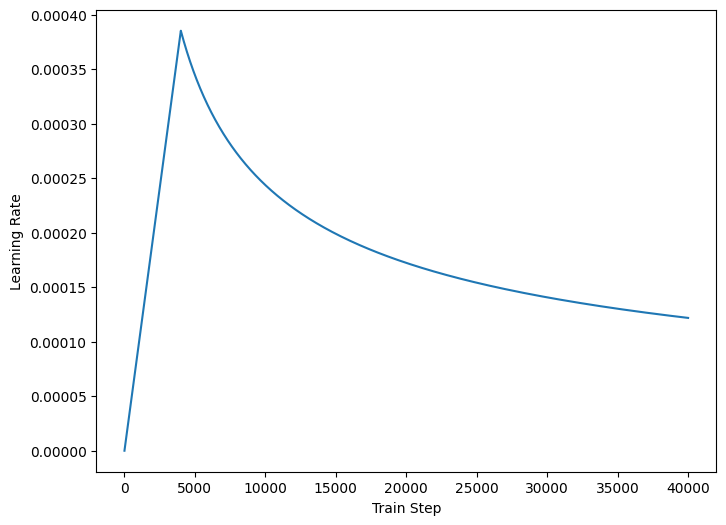

In [48]:
#a test of the learning rate 
plt.plot(learning_rate(tf.range(40000, dtype=tf.float32)))
plt.ylabel('Learning Rate')
plt.xlabel('Train Step')

In [49]:
def masked_loss(label, pred):
  print('heyo')
  print(pred.shape)
  print(label.shape)
  label = tf.squeeze(label,0)
  print(label.shape)
  mask = label != 0
  loss_object = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True, reduction='none')
  loss = loss_object(label, pred)

  mask = tf.cast(mask, dtype=loss.dtype)
  loss *= mask

  loss = tf.reduce_sum(loss)/tf.reduce_sum(mask)
  return loss


def masked_accuracy(label, pred):
  pred = tf.argmax(pred, axis=2)
  label = tf.cast(label, pred.dtype)
  match = label == pred

  mask = label != 0

  match = match & mask

  match = tf.cast(match, dtype=tf.float32)
  mask = tf.cast(mask, dtype=tf.float32)
  return tf.reduce_sum(match)/tf.reduce_sum(mask)

In [50]:
run_opts = tf.RunOptions(report_tensor_allocations_upon_oom = True)

AttributeError: module 'tensorflow' has no attribute 'RunOptions'

In [102]:
transformer.compile(optimizer=optimizer, 
                  loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True), 
                  metrics=[tf.keras.metrics.CategoricalAccuracy(name="accuracy"), tf.keras.metrics.TopKCategoricalAccuracy(k=5, name='top5 acc')]) 
#tf.keras.metrics.SparseTopKCategoricalAccuracy(5, name="top-5-accuracy")],) 


In [105]:
train_batches_small = (x3_train[0:750,:,:],y3_train[0:750,:,:])
train_batches_small = (x3_train[0:750,:,:],y3_train[0:750,:,:])
y3_small = y3_train[0:750,:,:]
print(y3_val.shape)

(336, 1, 1683)


In [108]:
train_batches = (x3_train,y3_train)



val_batches = (x3_val,y3_val)
transformer.fit(train_batches_small, y3_small,
                epochs=20, validation_data = val_batches, validation_batch_size = 336, batch_size = 750)

Epoch 1/20
context shapes:
(750, 12, 1686)
(750, 1, 1683)
(750, 1, 1683)
(750, 1, 1683)
(750, 1, 1683)
(750, 1, 1683)
1/1 [==============================] - ETA: 0s - loss: 3337.6052 - accuracy: 0.0000e+00 - top5 acc: 0.0027context shapes:
(12, 1686)
(12, 1686)


ValueError: in user code:

    File "c:\Users\Lucia\AppData\Local\Programs\Python\Python37\lib\site-packages\keras\engine\training.py", line 1727, in test_function  *
        return step_function(self, iterator)
    File "c:\Users\Lucia\AppData\Local\Programs\Python\Python37\lib\site-packages\keras\engine\training.py", line 1713, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\Lucia\AppData\Local\Programs\Python\Python37\lib\site-packages\keras\engine\training.py", line 1701, in run_step  **
        outputs = model.test_step(data)
    File "c:\Users\Lucia\AppData\Local\Programs\Python\Python37\lib\site-packages\keras\engine\training.py", line 1665, in test_step
        y_pred = self(x, training=False)
    File "c:\Users\Lucia\AppData\Local\Programs\Python\Python37\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\Lucia\AppData\Local\Temp\__autograph_generated_file3h3494ek.py", line 15, in tf__call
        x = ag__.converted_call(ag__.ld(self).decoder, (ag__.ld(x), ag__.ld(context)), None, fscope)
    File "C:\Users\Lucia\AppData\Local\Temp\__autograph_generated_filephycv7_d.py", line 24, in tf__call
        ag__.for_stmt(ag__.converted_call(ag__.ld(range), (ag__.ld(self).num_layers,), None, fscope), None, loop_body, get_state, set_state, ('x',), {'iterate_names': 'i'})
    File "C:\Users\Lucia\AppData\Local\Temp\__autograph_generated_filephycv7_d.py", line 22, in loop_body
        x = ag__.converted_call(ag__.ld(self).dec_layers[ag__.ld(i)], (ag__.ld(x), ag__.ld(context)), None, fscope)
    File "C:\Users\Lucia\AppData\Local\Temp\__autograph_generated_file730nzv93.py", line 10, in tf__call
        x = ag__.converted_call(ag__.ld(self).causal_self_attention, (), dict(x=ag__.ld(x)), fscope)
    File "C:\Users\Lucia\AppData\Local\Temp\__autograph_generated_file0p2ykr6a.py", line 11, in tf__call
        attn_output = ag__.converted_call(ag__.ld(self).mha, (), dict(query=ag__.ld(x), value=ag__.ld(x), key=ag__.ld(x), attention_mask=ag__.ld(causal_mask)), fscope)

    ValueError: Exception encountered when calling layer "transformer_17" "                 f"(type Transformer).
    
    in user code:
    
        File "C:\Users\Lucia\AppData\Local\Temp\ipykernel_6864\2740736487.py", line 20, in call  *
            x = self.decoder(x, context)  # (batch_size, target_len, d_model)
        File "c:\Users\Lucia\AppData\Local\Programs\Python\Python37\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler  **
            raise e.with_traceback(filtered_tb) from None
        File "C:\Users\Lucia\AppData\Local\Temp\__autograph_generated_filephycv7_d.py", line 24, in tf__call
            ag__.for_stmt(ag__.converted_call(ag__.ld(range), (ag__.ld(self).num_layers,), None, fscope), None, loop_body, get_state, set_state, ('x',), {'iterate_names': 'i'})
        File "C:\Users\Lucia\AppData\Local\Temp\__autograph_generated_filephycv7_d.py", line 22, in loop_body
            x = ag__.converted_call(ag__.ld(self).dec_layers[ag__.ld(i)], (ag__.ld(x), ag__.ld(context)), None, fscope)
        File "C:\Users\Lucia\AppData\Local\Temp\__autograph_generated_file730nzv93.py", line 10, in tf__call
            x = ag__.converted_call(ag__.ld(self).causal_self_attention, (), dict(x=ag__.ld(x)), fscope)
        File "C:\Users\Lucia\AppData\Local\Temp\__autograph_generated_file0p2ykr6a.py", line 11, in tf__call
            attn_output = ag__.converted_call(ag__.ld(self).mha, (), dict(query=ag__.ld(x), value=ag__.ld(x), key=ag__.ld(x), attention_mask=ag__.ld(causal_mask)), fscope)
    
        ValueError: Exception encountered when calling layer "decoder_18" "                 f"(type Decoder).
        
        in user code:
        
            File "C:\Users\Lucia\AppData\Local\Temp\ipykernel_6864\173314803.py", line 22, in call  *
                x  = self.dec_layers[i](x, context)
            File "c:\Users\Lucia\AppData\Local\Programs\Python\Python37\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler  **
                raise e.with_traceback(filtered_tb) from None
            File "C:\Users\Lucia\AppData\Local\Temp\__autograph_generated_file730nzv93.py", line 10, in tf__call
                x = ag__.converted_call(ag__.ld(self).causal_self_attention, (), dict(x=ag__.ld(x)), fscope)
            File "C:\Users\Lucia\AppData\Local\Temp\__autograph_generated_file0p2ykr6a.py", line 11, in tf__call
                attn_output = ag__.converted_call(ag__.ld(self).mha, (), dict(query=ag__.ld(x), value=ag__.ld(x), key=ag__.ld(x), attention_mask=ag__.ld(causal_mask)), fscope)
        
            ValueError: Exception encountered when calling layer "decoder_layer_72" "                 f"(type DecoderLayer).
            
            in user code:
            
                File "C:\Users\Lucia\AppData\Local\Temp\ipykernel_6864\977551661.py", line 23, in call  *
                    x = self.causal_self_attention(x=x)
                File "c:\Users\Lucia\AppData\Local\Programs\Python\Python37\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler  **
                    raise e.with_traceback(filtered_tb) from None
                File "C:\Users\Lucia\AppData\Local\Temp\__autograph_generated_file0p2ykr6a.py", line 11, in tf__call
                    attn_output = ag__.converted_call(ag__.ld(self).mha, (), dict(query=ag__.ld(x), value=ag__.ld(x), key=ag__.ld(x), attention_mask=ag__.ld(causal_mask)), fscope)
            
                ValueError: Exception encountered when calling layer "causal_self_attention_73" "                 f"(type CausalSelfAttention).
                
                in user code:
                
                    File "C:\Users\Lucia\AppData\Local\Temp\ipykernel_6864\2565678012.py", line 4, in call  *
                        attn_output = self.mha(
                    File "c:\Users\Lucia\AppData\Local\Programs\Python\Python37\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler  **
                        raise e.with_traceback(filtered_tb) from None
                
                    ValueError: Exception encountered when calling layer "query" "                 f"(type EinsumDense).
                    
                    Shape must be rank 3 but is rank 2
                    	 for 0th input and equation: abc,cde->abde for '{{node transformer_17/decoder_18/decoder_layer_72/causal_self_attention_73/multi_head_attention_147/query/einsum/Einsum}} = Einsum[N=2, T=DT_FLOAT, equation="abc,cde->abde"](transformer_17/decoder_18/dropout_110/Identity, transformer_17/decoder_18/decoder_layer_72/causal_self_attention_73/multi_head_attention_147/query/einsum/Einsum/ReadVariableOp)' with input shapes: [12,1686], [1683,5,1683].
                    
                    Call arguments received by layer "query" "                 f"(type EinsumDense):
                      • inputs=tf.Tensor(shape=(12, 1686), dtype=float32)
                
                
                Call arguments received by layer "causal_self_attention_73" "                 f"(type CausalSelfAttention):
                  • x=tf.Tensor(shape=(12, 1686), dtype=float32)
            
            
            Call arguments received by layer "decoder_layer_72" "                 f"(type DecoderLayer):
              • x=tf.Tensor(shape=(12, 1686), dtype=float32)
              • context=tf.Tensor(shape=(12, 1686), dtype=float32)
        
        
        Call arguments received by layer "decoder_18" "                 f"(type Decoder):
          • x=tf.Tensor(shape=(12, 1686), dtype=float32)
          • context=tf.Tensor(shape=(12, 1686), dtype=float32)
    
    
    Call arguments received by layer "transformer_17" "                 f"(type Transformer):
      • inputs=tf.Tensor(shape=(336, 12, 1686), dtype=float32)


In [ ]:
print(y3_train.shape)

(2148, 1, 1683)


In [101]:
print(x3_val.shape)

(336, 12, 1686)


In [ ]:

y

<tf.Tensor: shape=(2148, 1, 1683), dtype=float64, numpy=
array([[[0.        , 0.        , 0.00763359, ..., 0.00869565,
         0.        , 0.00367647]],

       [[0.00510204, 0.01840491, 0.        , ..., 0.00869565,
         0.        , 0.        ]],

       [[0.01530612, 0.00613497, 0.01526718, ..., 0.        ,
         0.        , 0.00367647]],

       ...,

       [[0.25      , 0.09202454, 0.00763359, ..., 0.07826087,
         0.05333333, 0.04044118]],

       [[0.15816327, 0.09815951, 0.02290076, ..., 0.09565217,
         0.12      , 0.09926471]],

       [[0.09693878, 0.0797546 , 0.01526718, ..., 0.06521739,
         0.05333333, 0.05147059]]])>

In [ ]:
y3_train.shape

TensorShape([2148, 1, 1683])

In [ ]:
y3_test.shape

TensorShape([2148, 1, 1683])